<a href="https://colab.research.google.com/github/sajadamouei/Peak-detection-chip-seq/blob/main/ML_Peaks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Framework Information

In [ ]:
# GPU information
#!nvidia-smi -L
!nvidia-smi

Thu Jan 19 10:03:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    29W /  70W |      0MiB / 15109MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# H.D.D information
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   24G   56G  30% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.1G  910M  54% /sbin/docker-init
/dev/sda1        50G   25G   26G  49% /opt/bin/.nvidia
tmpfs           6.4G   32K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            79G   26G   53G  34% /content/drive


In [ ]:
# CPU infoemation
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
# Memory information
!cat /proc/meminfo

MemTotal:       13297228 kB
MemFree:         7024464 kB
MemAvailable:   10113068 kB
Buffers:           66460 kB
Cached:          2626964 kB
SwapCached:            0 kB
Active:           684720 kB
Inactive:        5324808 kB
Active(anon):       1016 kB
Inactive(anon):  2727712 kB
Active(file):     683704 kB
Inactive(file):  2597096 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               772 kB
Writeback:             0 kB
AnonPages:       3316160 kB
Mapped:           289400 kB
Shmem:              1288 kB
KReclaimable:      98512 kB
Slab:             134880 kB
SReclaimable:      98512 kB
SUnreclaim:        36368 kB
KernelStack:        5968 kB
PageTables:        33208 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648612 kB
Committed_AS:    5822256 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       50560 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
import sys
print('python version= ',sys.version)
import tensorflow as tf
print('tf version= ',tf.__version__)
import keras
print('keras version= ',keras.__version__)

python version=  3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
tf version=  2.11.0
keras version=  2.11.0


In [ ]:
import pkg_resources

pkg_resources.get_distribution("google-colab").version

'1.0.0'

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


# Folders tree diagrams and display .bed and .bedgraph files

In [ ]:
!pip install seedir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 4.2 MB/s 
     |████████████████████████████████| 197 kB 29.4 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=b828f08ade7641c0ada5bc1d8d42f8ec8c58836f45ef0a39d3eb79897fd23304
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [ ]:
import seedir as sd
sd.seedir('/content', style='emoji')

📁 content/
├─📁 .config/
│ ├─📁 configurations/
│ │ └─📄 config_default
│ ├─📄 .last_update_check.json
│ ├─📄 active_config
│ ├─📄 .last_opt_in_prompt.yaml
│ ├─📄 .last_survey_prompt.yaml
│ ├─📄 gce
│ ├─📄 config_sentinel
│ └─📁 logs/
│   └─📁 2022.08.15/
│     ├─📄 13.44.41.125604.log
│     ├─📄 13.43.53.840714.log
│     ├─📄 13.44.40.370262.log
│     ├─📄 13.44.20.441098.log
│     ├─📄 13.44.12.999341.log
│     └─📄 13.43.32.260465.log
└─📁 sample_data/
  ├─📄 anscombe.json
  ├─📄 README.md
  ├─📄 california_housing_test.csv
  ├─📄 california_housing_train.csv
  ├─📄 mnist_test.csv
  └─📄 mnist_train_small.csv


In [ ]:
#Compare with bcell
content = []
with open("/content/drive/MyDrive/PhD/1-DEDProject/3-Chip-seq/H3K9me3_TDH_BP/samples/bcell/ERS206573/problems/chr4_68270000-75427379/coverage.bedGraph")as f:
    for line in f:
        content.append(line.strip().split())

content

In [ ]:
content = []
with open("/content/labels.bed")as f:
    for line in f:
        content.append(line.strip().split())

content

[['chr6', '74026739', '74033802', 'peakEnd'],
 ['chr6', '74036062', '74064918', 'noPeaks'],
 ['chr6', '74080861', '74086466', 'peakEnd'],
 ['chr6', '74086776', '74137477', 'noPeaks']]

# Extract and Decode the H3K9me3_TDH_BP ChIP-seq dataset

In [ ]:
# find subfolders and extract .gz files in the chip-seq dataset

import os, gzip, shutil

z=0
o=0
def gz_extract(directory):
    extension = ".gz"
    os.chdir(directory)
    for item in os.listdir(directory): # loop through items in dir
      if item.endswith(extension): # check for ".gz" extension
          gz_name = os.path.abspath(item) # get full path of files
          file_name = (os.path.basename(gz_name)).rsplit('.',1)[0] #get file name for file within
          with gzip.open(gz_name,"rb") as f_in, open(file_name,"wb") as f_out:
              shutil.copyfileobj(f_in, f_out)
#          os.remove(gz_name) # delete zipped file




for path, subdirs, files in os.walk('/content/drive/MyDrive/PhD/1-DEDProject/3-Chip-seq/H3K9me3_TDH_BP/samples'):
    for name in files:
      if (z%2) == 0:
        print(os.path.join(path))
        gz_extract(os.path.join(path))
        o+=1
      z+=1

print('Number of files = ',z)
print('Number of files extracted = ', o)

In [ ]:
import os

lst_ad = []
num = 0
co = 0

for path, subdirs, files in os.walk('C:/Users/47966/Desktop/delete/chip/H3K9me3_TDH_BP/samples'):
    for name in files:
        if (co%2) == 0:
            lst_ad.append(os.path.join(path))
            num+=1
        co+=1

print('Number of folders = ', num)

In [ ]:
# Decode coverage.bedgraph files

import numpy as np
import os

   
    
f_data = []
    
for l in range(len(lst_ad)): # Read the coverage and label files
    coverage = []
    with open(os.path.join(lst_ad[l],"coverage.bedGraph"))as f:
        for line in f:
            coverage.append(line.strip().split())

    labels = []
    with open(os.path.join(lst_ad[l],"labels.bed"))as f:
        for line in f:
            labels.append(line.strip().split())
        
    n = int(coverage[len(coverage)-1][2]) # Last genomic position number
    m = int(coverage[0][1]) # First genomic position number

    data = np.zeros(shape=(2,n-m)) # One array for each coverage file

    count = 0

    for i in range(len(coverage)): # Decode the encoded coverage file in a 2D arry
        for j in range(int(coverage[i][2])-int(coverage[i][1])):
            data[0,count] = int(coverage[i][1]) + j + 1
            data[1,count] = int(coverage[i][3])
            count += 1
        
    for i in range(len(labels)): # Save the labeled parts of coverage file based label file from the 2D array
            
        t, s_point = np.where(data == int(labels[i][1]))
        t, e_point = np.where(data == int(labels[i][2]))
        s_point = int(s_point)-5000 # Pick the labelled sequence with addtional  5000 lenght before start point
        e_point = int(e_point)+5000 # Pick the labelled sequence with addtional  5000 lenght after end point
        
        f_data.append(coverage[0][0])
        f_data.append(list(data[1,s_point:e_point]))
        f_data.append(labels[i][3])

    print(l)

In [ ]:
import pickle # Save decoded and labeled dataset in a list .ob file
with open('C:/Users/47966/Desktop/delete/chip/f_data2.ob', 'wb') as fp:
    pickle.dump(f_data, fp)

# Plot of a coverage.bedgraph file

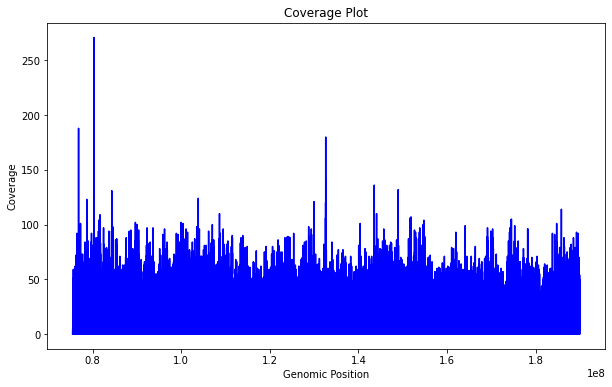

In [ ]:
import numpy as np
# read data from the file
data = np.loadtxt('/content/coverage.bedGraph', usecols=(1, 2, 3))

# plot the 
fig = plt.figure(figsize=(10, 6))
plt.plot(data[:, 0], data[:, 2], color='blue')
plt.xlabel('Genomic Position')
plt.ylabel('Coverage')
plt.title('Coverage Plot')

# show the plot
plt.show()

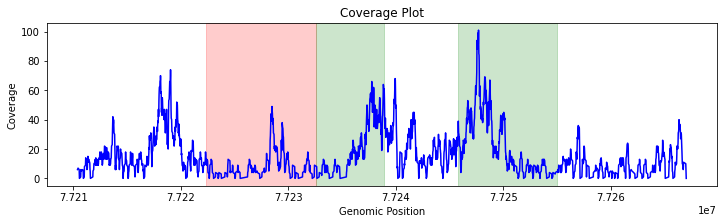

In [ ]:
# read data from the file
data = np.loadtxt('/content/coverage.bedGraph', usecols=(1, 2, 3))

# subset data to the specific genomic region
start_pos = 77210375
end_pos = 77267036
mask = (data[:, 0] >= start_pos) & (data[:, 0] <= end_pos)
data = data[mask, :]

# create a new figure with a larger size
fig = plt.figure(figsize=(12, 3))

# plot the data
plt.plot(data[:, 0], data[:, 2], color='blue')
plt.xlabel('Genomic Position')
plt.ylabel('Coverage')
plt.title('Coverage Plot')

plt.axvspan(77222375, 77232602, alpha=0.2, color='red')
plt.axvspan(77232603, 77238871, alpha=0.2, color='green')
plt.axvspan(77245799, 77255036, alpha=0.2, color='green')

# show the plot
plt.show()

# Load decoded data and Pre-processing

In [ ]:
# Download the decoded H3K9me3\_TDH\_BP ChIP-seq dataset from google drive

!pip uninstall gdown -y && pip install gdown
!gdown -V

!gdown --folder https://drive.google.com/drive/folders/1gmQrgtCoW8uprlt7pgwzkIxSoEReGgYo?usp=share_link -O /content


Retrieving folder list
Processing file 13s3vsidbiBHSmRuLXk2MZsGXyOdb-oAA f_data2.ob
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From (uriginal): https://drive.google.com/uc?id=13s3vsidbiBHSmRuLXk2MZsGXyOdb-oAA
From (redirected): https://drive.google.com/uc?id=13s3vsidbiBHSmRuLXk2MZsGXyOdb-oAA&confirm=t&uuid=f8274709-227e-46af-b7f6-4aa928b0b47d
To: /content/f_data2.ob
100% 299M/299M [00:01<00:00, 230MB/s]
Download completed


In [ ]:
# Load decoded dataset

# Data structure is like: [chromosom, sequence, label, chromosome, sequence, label,..., chromosome, sequence, label]

import numpy as np
import pickle

with open ('/content/f_data2.ob', 'rb') as fp:
    lst_data = pickle.load(fp)

print("Length of dataset list: ",len(lst_data))

# Number of Peak and NoPeaks sequences before using sliding windows technique

count_nopeaks = sum(1 for i in lst_data if i == "noPeaks")

print("Number of Peaks sequnces = " , 540-count_nopeaks)
print("Number of noPeaks sequnces = " , count_nopeaks)


# Total length of NoPeaks and Peaks sequences

nopeaks_length = 0
peaks_length = 0
for i in range(0, len(lst_data), 3):
    if lst_data[i+2] == "noPeaks":
        nopeaks_length += len(lst_data[i+1])
    else:
        peaks_length += len(lst_data[i+1])

print("Sum of length of sequences with noPeaks label:", nopeaks_length)
print("Sum of length of sequences with peaks label:", peaks_length)


# Specify window size, shift size and pick more

win_size = 4001 #@param {type:"slider", min:1000, max:10001, step:500}

shift_size = 500 #@param {type:"slider", min:50, max:3000, step:50}

# Pick more for each side of a sequence
pick_more = 1500 #@param {type:"slider", min:0, max:5000, step:500}


# Extract sequences based on window size and shift size and pick more from the decoded dataset

seq_size = 0
for i in range (1,len(lst_data),3):
  seq_size =len(lst_data[i]) - 10000
  lst_data[i] = lst_data[i][5000-pick_more:5000+seq_size+pick_more]


lst_train = []
lst_lbl = []
nu_pseq = 0
nu_npseq = 0

for i in range(1,len(lst_data),3): # Go through all sequences
  s_point = 0
  if lst_data[i+1] == "noPeaks":
    while (s_point+win_size<=len(lst_data[i])): # Selection of sequences with window size
      lst_train.append(lst_data[i][s_point:s_point+win_size])
      s_point = s_point + (shift_size*6)
      lst_lbl.append(0)
      nu_npseq+=1

  else:
      while (s_point+win_size<=len(lst_data[i])):
        lst_train.append(lst_data[i][s_point:s_point+win_size])
        s_point+=shift_size
        lst_lbl.append(1)
        nu_pseq+=1
      

print("Number of Peaks sequnces = " , nu_pseq)
print("Number of noPeaks sequnces = " , nu_npseq)


# Convert lists to arrays

train_data = np.array(lst_train).astype('float32')
train_label = np.array(lst_lbl).astype('float32')

print('Data array shape = ', train_data.shape)
print('Label array shape = ', train_label.shape)

# Select a Feature reduction method

In [ ]:
# Feature reduction (avg and max)

fe_se = np.zeros((train_data.shape[0],2), dtype=float)
av = np.average(train_data,axis=1)
mx = train_data.max(axis=1)

for i in range (0,train_data.shape[0]):
  fe_se[i][0] = av[i]
  fe_se[i][1] = mx[i]

train_data = fe_se
train_data.shape

(27792, 2)

In [ ]:
# Feature reduction with PCA

from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
train_data = pca1.fit_transform(train_data)
print(train_data.shape)

(27792, 2)


In [ ]:
# Feature reduction Independent Component Analysis (ICA)

from sklearn.decomposition import FastICA

pca1 = FastICA(n_components=2)
train_data = pca1.fit_transform(train_data)
print(train_data.shape)

(27792, 2)


In [ ]:
# Feature reduction Linear Discriminant Analysis (LDA)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
train_data = lda.fit(train_data, train_label).transform(train_data)
train_data.shape

(5814, 1)

In [ ]:
# Feature reduction (Mean and PTP and STD)

fe_se = np.zeros((train_data.shape[0],3), dtype=float)
mean_seq = np.mean(train_data,axis=1)
ptp_seq = np.ptp(train_data,axis=1)
std_seq = np.std(train_data,axis=1)

for i in range (0,train_data.shape[0]):
  fe_se[i][0] = mean_seq[i]
  fe_se[i][1] = ptp_seq[i]
  fe_se[i][2] = std_seq[i]

train_data = fe_se
train_data.shape

(27792, 3)

# Split data

In [ ]:
# Split data for training and testing models

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.3, random_state = 777)

print('x_train array shape = ' , x_train.shape)
print('x_test array shape = ' , x_test.shape)
print('y_train array shape = ' , y_train.shape)
print('y_test array shape = ' , y_test.shape)

x_train array shape =  (4069, 1)
x_test array shape =  (1745, 1)
y_train array shape =  (4069,)
y_test array shape =  (1745,)


# Plot functions

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix, mean_squared_error
from time import time
import seaborn as sns
import matplotlib.pyplot as plt

def plt_res(y_test, y_pred,ttl):

  #Generate the confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)

  group_names = ['True Neg','False Pos','False Neg','True Pos']

  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title(ttl);
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [ ]:
# Summarize history for accuracy

def acc_plt(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [ ]:
# Summarize history for loss

def loss_plt(history):

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

# ML algorithms and Evaluations

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
#xgb.XGBClassifier(objective="binary:logistic")
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
#DummyClassifier(strategy="most_frequent")

from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import precision_recall_fscore_support

In [ ]:

t0 = time()
kfold = KFold(n_splits=5, shuffle=False, random_state=None)
scores = []
acc_lst = []
for train_index, test_index in kfold.split(x_train):   
    xx_train, xx_test = x_train[train_index], x_train[test_index]
    yy_train, yy_test = y_train[train_index], y_train[test_index]
    other_model = SVC()
    other_model.fit(xx_train, yy_train)
    y_pred_other = other_model.predict(xx_test)
    acc_lst.append((round(accuracy_score(yy_test, y_pred_other),4))*100)

print('Training time = ', time()-t0) 
#display_scores(np.sqrt(scores))
print(acc_lst)
y_pred_other = other_model.predict(x_test)

Training time =  0.3027002811431885
[97.17, 97.42, 95.58, 96.67999999999999, 95.94]


Acuuracy =  96.45 



 precision_recall_f1-score =  (0.9648890644545394, 0.9641519951200017, 0.9644174579745151, None) 

Balanced accuracy 96.41999999999999 

MCC =  92.9 



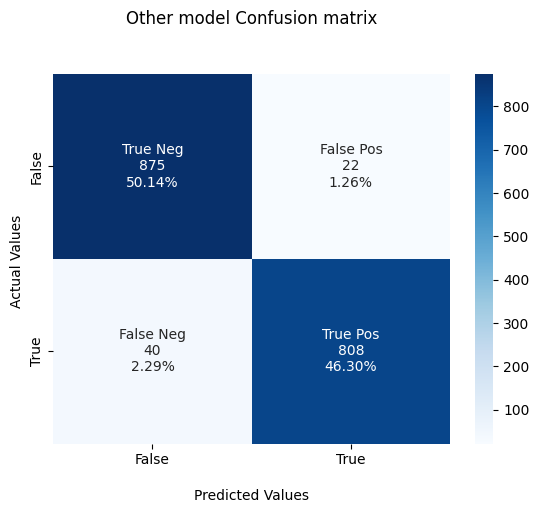

In [ ]:
# Accuracy
print("Acuuracy = ", round(accuracy_score(y_test, y_pred_other),4)*100,"\n")

# Precision, recall, F-measure
print("\n\n precision_recall_f1-score = ", precision_recall_fscore_support(y_test, y_pred_other,average='macro'),"\n")

# Balanced Accuracy
print("Balanced accuracy",round(balanced_accuracy_score(y_test, y_pred_other),4)*100,"\n")

# Matthews Correlation Coefficient
print("MCC = ", round(matthews_corrcoef(y_test, y_pred_other),4)*100,"\n")

plt_res(y_test, y_pred_other,"Other model Confusion matrix\n\n")